# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import missingno as msno
from utils import *

In [2]:
# Import data
df = pd.read_csv("../data/processed/after_prep.csv")
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  Price    Brand  Series Type  Mileage (kmpl)  Engine (CC)  \
0    5.0   1.75   Maruti   Wagon    R           26.60        998.0   
1    5.0  12.50  Hyundai   Creta  1.6           19.67       1582.0   
2    5.0   4.50    Honda    Jazz    V           18.20       1199.0   
3    7.0   6.00   Maruti  Ertiga  VDI           20.77       1248.0   
4    5.0  17.74     Audi      A4  New           15.20       1968.0   

   Power (bhp)  
0        58.16  
1       126.20  
2        88.70  
3        88.76  
4       140.80

In [3]:
# Summary statistic
df.describe()

Year  Kilometers_Driven        Seats        Price  \
count  6019.000000       6.019000e+03  5976.000000  6019.000000   
mean   2013.358199       5.873838e+04     5.279618     9.479468   
std       3.269742       9.126884e+04     0.806019    11.187917   
min    1998.000000       1.710000e+02     2.000000     0.440000   
25%    2011.000000       3.400000e+04     5.000000     3.500000   
50%    2014.000000       5.300000e+04     5.000000     5.640000   
75%    2016.000000       7.300000e+04     5.000000     9.950000   
max    2019.000000       6.500000e+06    10.000000   160.000000   

       Mileage (kmpl)  Engine (CC)  Power (bhp)  
count     5951.000000  5983.000000  5876.000000  
mean        18.336088  1621.276450   113.253050  
std          4.188291   601.355233    53.874957  
min          0.000000    72.000000    34.200000  
25%         15.300000  1198.000000    75.000000  
50%         18.200000  1493.000000    97.700000  
75%         21.100000  1984.000000   138.100000  
max         33.540000  5998.000000   560.000000

<AxesSubplot:>

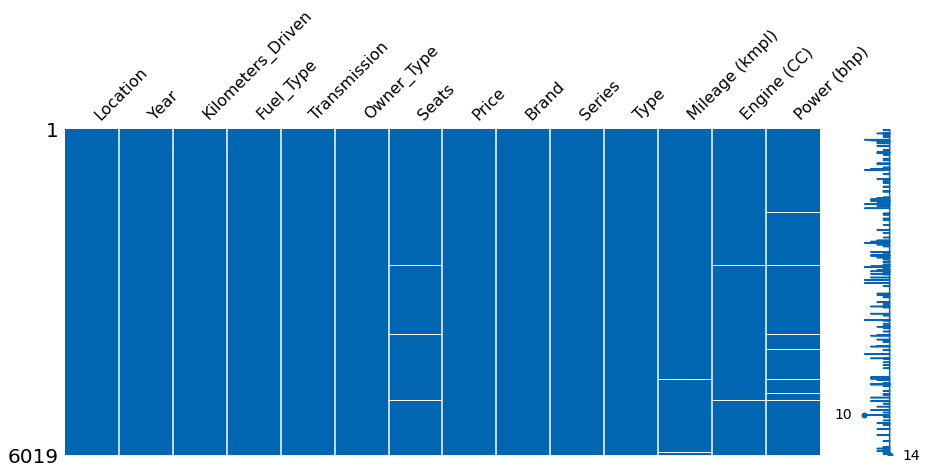

In [4]:
# Missing value matrix
msno.matrix(df, color=(0, 0.4, 0.7), figsize=(15, 6))

## Univariate Analysis

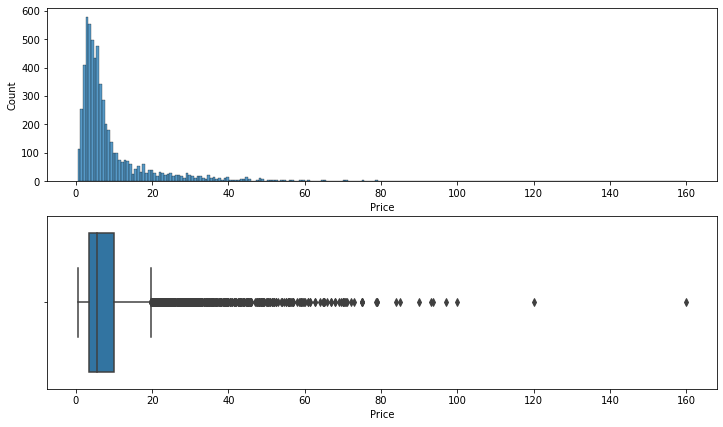

In [5]:
# Plot target variable distribution
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
sns.histplot(data=df, x="Price", ax=ax[0])
sns.boxplot(data=df, x="Price", ax=ax[1])
plt.show()

In [6]:
# Examine price greater than 80
df[df["Price"] > 80]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1505       Kochi  2019              26013    Diesel    Automatic      First   
1974  Coimbatore  2018              28060    Petrol    Automatic      First   
1984   Bangalore  2017              17465    Petrol    Automatic      First   
2095  Coimbatore  2019               2526    Petrol    Automatic      First   
4079   Hyderabad  2017              25000    Diesel    Automatic      First   
4691   Bangalore  2014               3000    Petrol    Automatic     Second   
5535   Ahmedabad  2015              97003    Diesel    Automatic      First   
5781       Delhi  2011               6500    Petrol    Automatic      Third   
5919   Hyderabad  2015               8000    Petrol    Automatic      First   

      Seats   Price          Brand     Series    Type  Mileage (kmpl)  \
1505    5.0   97.07           Land      Rover   Range           12.65   
1974    5.0   93.67            BMW          7  Series           12.05   
1984    5.0   93.00            BMW          7  Series           12.05   
2095    2.0   83.96  Mercedes-Benz        SLC      43           19.00   
4079    5.0  160.00           Land      Rover   Range           13.33   
4691    2.0   90.00  Mercedes-Benz  SLK-Class      55           12.00   
5535    5.0   85.00            BMW         X6  xDrive           15.87   
5781    2.0  120.00    Lamborghini   Gallardo   Coupe            6.40   
5919    2.0  100.00         Jaguar          F    Type           12.50   

      Engine (CC)  Power (bhp)  
1505       2993.0       255.00  
1974       2979.0       320.00  
1984       2979.0       320.00  
2095       2996.0       362.07  
4079       2993.0       255.00  
4691       5461.0       421.00  
5535       2993.0       308.43  
5781       5204.0       560.00  
5919       5000.0       488.10

In [7]:
# Categorize cols variables for plotting
num_cols = [
    col for col in df.drop(columns="Price").columns if df[col].dtype != "object"
]
cat_cols = [
    col for col in df.drop(columns="Price").columns if df[col].dtype == "object"
]

### Numerical features

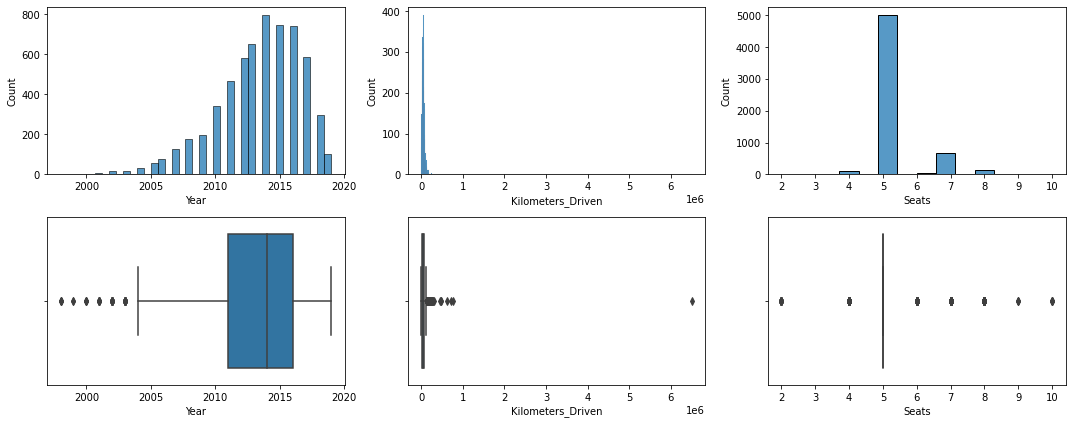

In [8]:
# Plotting first 3 numerical features distribution
plt.figure(figsize=(15, 6))

for index, col in enumerate(num_cols[:3]):
    plt.subplot(2, 3, index + 1)
    sns.histplot(data=df, x=col)

for index, col in enumerate(num_cols[:3]):
    plt.subplot(2, 3, index + 4)
    sns.boxplot(data=df, x=col)

plt.tight_layout()
plt.show()

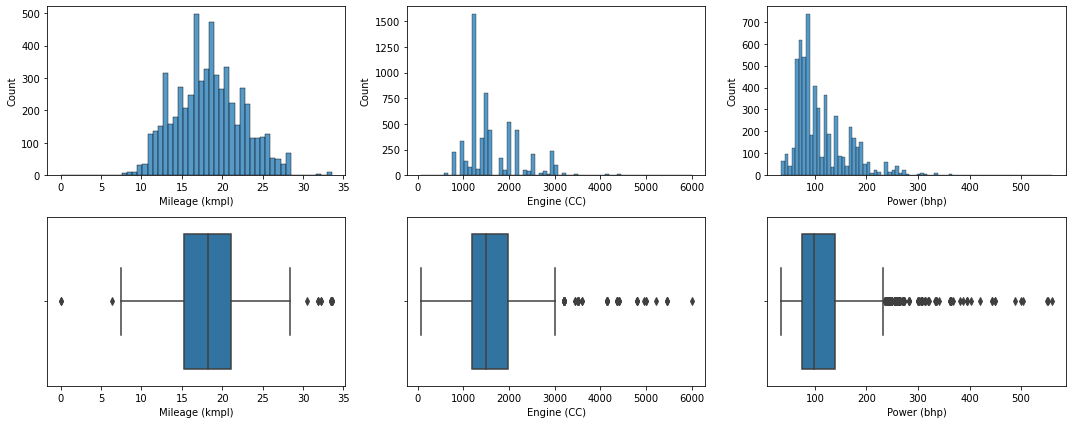

In [9]:
# Plot last 3 numerical features distribution
plt.figure(figsize=(15, 6))

for index, col in enumerate(num_cols[3:]):
    plt.subplot(2, 3, index + 1)
    sns.histplot(data=df, x=col)

for index, col in enumerate(num_cols[3:]):
    plt.subplot(2, 3, index + 4)
    sns.boxplot(data=df, x=col)

plt.tight_layout()
plt.show()

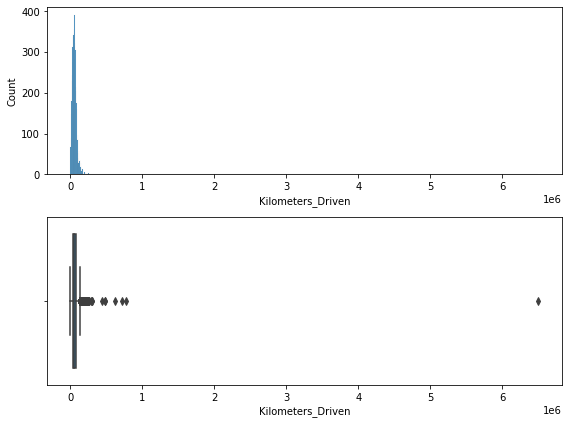

In [10]:
# Examine outlier on Kilometers Driven feature
plt.figure(figsize=(8, 6))
plt.subplot(211)
sns.histplot(data=df, x="Kilometers_Driven")
plt.subplot(212)
sns.boxplot(data=df, x="Kilometers_Driven")
plt.tight_layout()
plt.show()

In [11]:
df = df[~(df.Kilometers_Driven > 1e6)]
df.shape

(6018, 14)

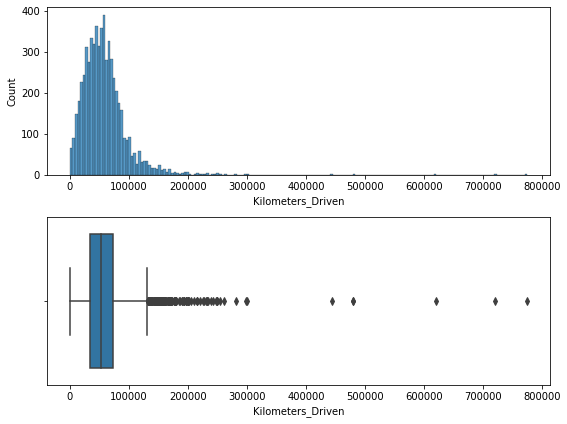

In [12]:
# Plot after outlier removed
plt.figure(figsize=(8, 6))
plt.subplot(211)
sns.histplot(data=df, x="Kilometers_Driven")
plt.subplot(212)
sns.boxplot(data=df, x="Kilometers_Driven")
plt.tight_layout()
plt.show()

In [13]:
# Examine car that have seats more than or equal 9
df[df.Seats >= 9]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
814        Pune  2004              77757    Diesel       Manual     Second   
917      Mumbai  2013              20000    Diesel       Manual      First   
1347  Bangalore  2007              74112    Diesel       Manual      First   
1907  Bangalore  2002              63000    Diesel       Manual      Third   
2267       Pune  2004             215750    Diesel       Manual     Second   
2312    Kolkata  2012              67132    Diesel       Manual      First   
2359    Chennai  2016             150000    Diesel       Manual      First   
2575  Hyderabad  2015             120000    Diesel       Manual      First   

      Seats  Price      Brand   Series Type  Mileage (kmpl)  Engine (CC)  \
814    10.0   3.50     Toyota   Qualis   FS           13.10       2446.0   
917    10.0   5.25       Tata     Sumo   DX           14.07       1978.0   
1347    9.0   4.10   Mahindra  Scorpio   LX           12.05       2179.0   
1907   10.0   3.65     Toyota   Qualis   FS           13.10       2446.0   
2267   10.0   3.50     Toyota   Qualis   RS             NaN       2446.0   
2312    9.0   4.75  Chevrolet   Tavera   LT           13.58       2499.0   
2359    9.0   4.50   Mahindra     Xylo   D2           14.95       2489.0   
2575   10.0   5.50  Chevrolet   Tavera   LS           14.80       2499.0   

      Power (bhp)  
814          75.0  
917          83.1  
1347        120.0  
1907         75.0  
2267          NaN  
2312         78.0  
2359         93.7  
2575         80.0

### Categorical features

In [14]:
df.describe(include=["object"])

Location Fuel_Type Transmission Owner_Type   Brand Series  Type
count      6018      6018         6018       6018    6018   6018  6018
unique       11         5            2          4      30    212   339
top      Mumbai    Diesel       Manual      First  Maruti  Swift   1.5
freq        790      3204         4299       4928    1211    353   286

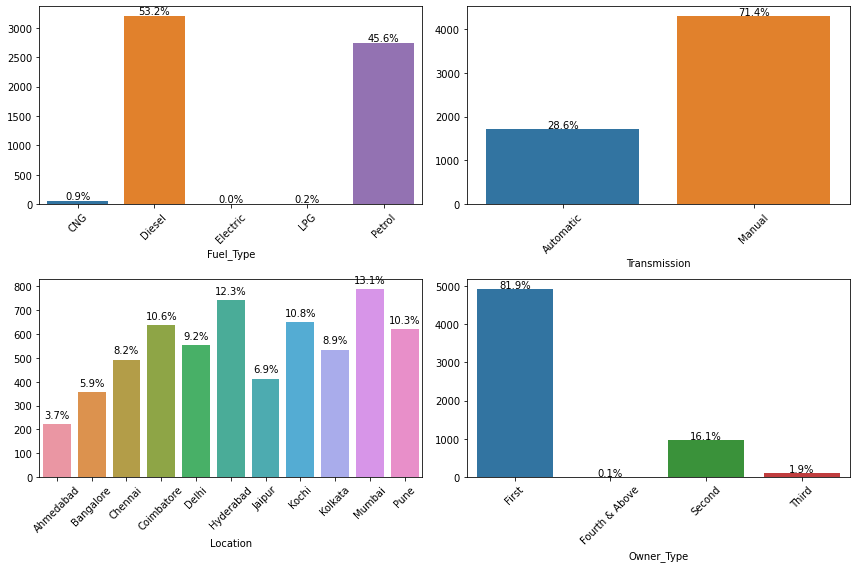

In [15]:
# Make count plot the categorical features
cols_toplot = ["Fuel_Type", "Transmission", "Location", "Owner_Type"]
plt.figure(figsize=(12, 8))
countplot_annot(2, 2, data=df, columns=cols_toplot, rotate=45, rcol=cols_toplot)
plt.tight_layout()
plt.show()

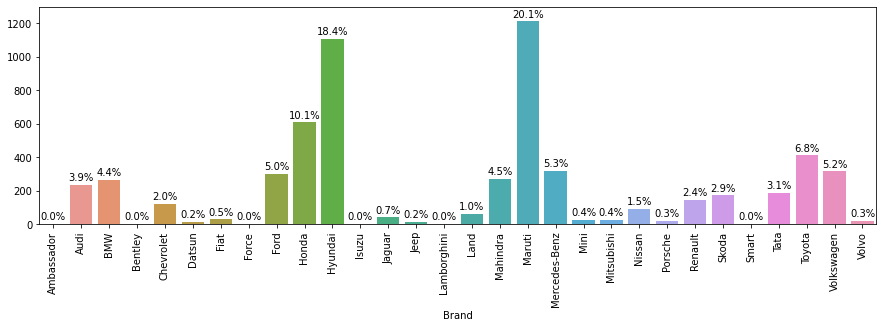

In [16]:
# Count plot for Brand feature
plt.figure(figsize=(15, 4))
countplot_annot(1, 1, data=df, columns=["Brand"], rotate=90, rcol=["Brand"])
plt.ylim(0, 1300)
plt.show()

## Bivariate Analysis

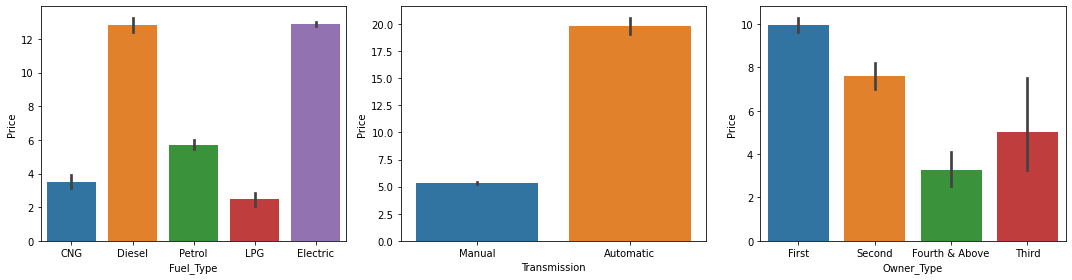

In [17]:
# Bar plot with mean value of Price by Fuel_Type, Transmission, and Owner_Type
plt.figure(figsize=(15, 4))

for index, col in enumerate(["Fuel_Type", "Transmission", "Owner_Type"]):
    plt.subplot(1, 3, index + 1)
    sns.barplot(data=df, x=col, y="Price")

plt.tight_layout()
plt.show()

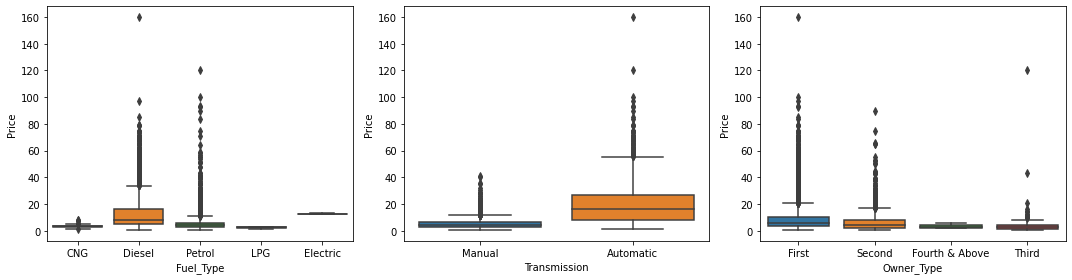

In [18]:
# Box plot with mean value of Price by Fuel_Type, Transmission, and Owner_Type
plt.figure(figsize=(15, 4))

for index, col in enumerate(["Fuel_Type", "Transmission", "Owner_Type"]):
    plt.subplot(1, 3, index + 1)
    sns.boxplot(data=df, x=col, y="Price")

plt.tight_layout()
plt.show()

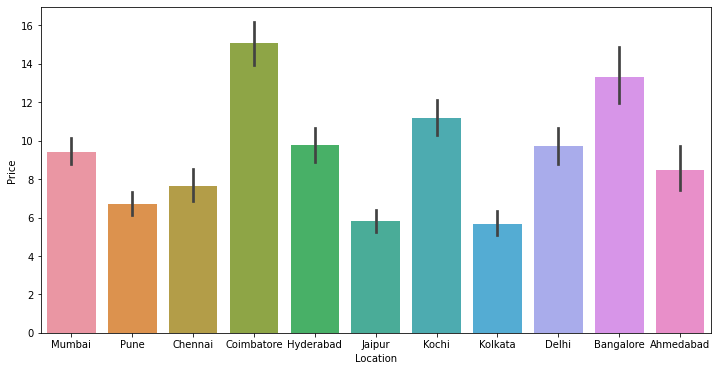

In [19]:
# Bar plot with mean value of Price by Location
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Location", y="Price")
plt.show()

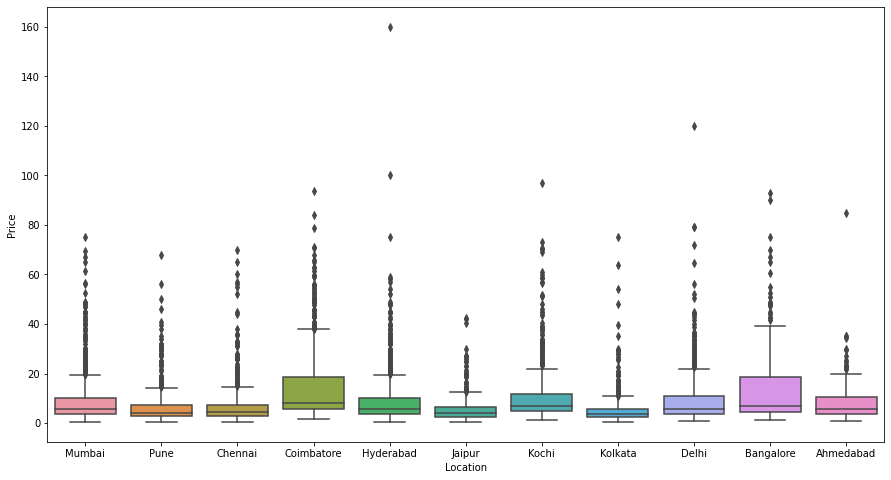

In [20]:
# Box plot with mean value of Price by Location
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="Location", y="Price")
plt.show()

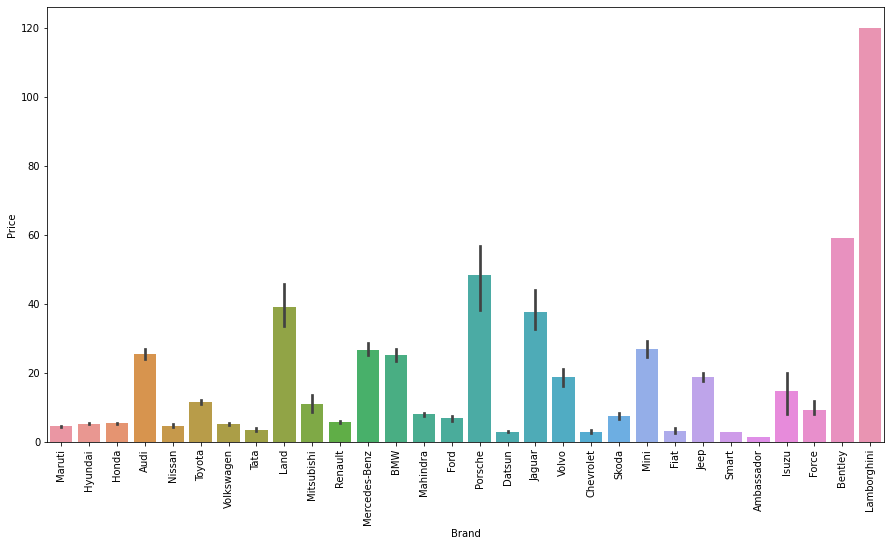

In [21]:
# Bar plot with mean value of Price by Brand
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="Brand", y="Price")
plt.xticks(rotation=90)
plt.show()

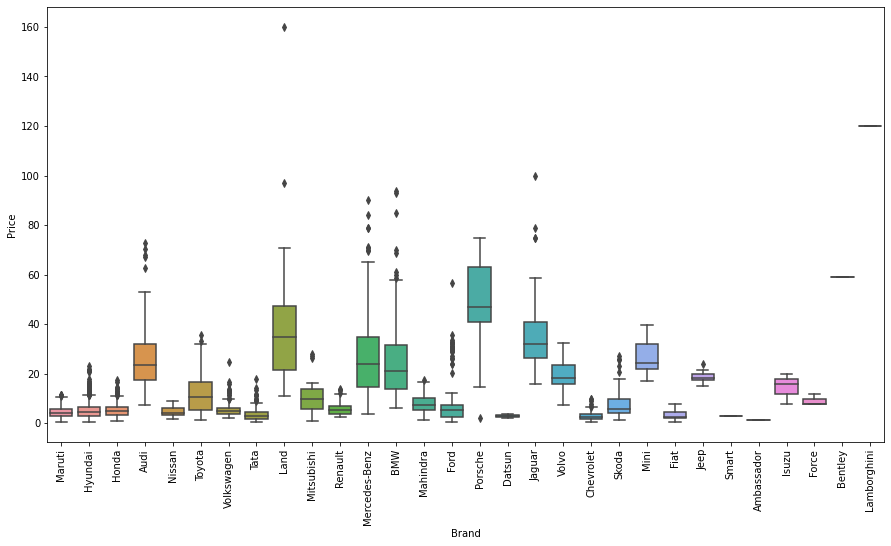

In [22]:
# Box plot with mean value of Price by Brand
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="Brand", y="Price")
plt.xticks(rotation=90)
plt.show()

In [23]:
# Correlation heatmap
import category_encoders as ce

t_encoder = ce.TargetEncoder()
df_temp = t_encoder.fit_transform(df.drop(columns=["Price"]), df["Price"])
df_temp = pd.concat([df_temp, df["Price"]], axis=1)
df_temp.drop(["Segment", "Zone"], axis=1, inplace=True)

sns.set(font_scale=1.8)
plt.figure(figsize=(14, 10))
sns.heatmap(df_temp.corr(), annot=True, linewidths=0.5, fmt=".2f", annot_kws={"size": 14})
plt.show()

KeyError: "['Segment' 'Zone'] not found in axis"

In [160]:
# Bubble plot Engine and Power correlation with Price and Transmission
import plotly.express as px

fig = px.scatter(
    df,
    x="Power (bhp)",
    y="Engine (CC)",
    size="Price",
    color="Transmission",
    hover_name="Brand",
    log_x=False,
    size_max=30,
    height=600,
    width=900
)

fig.update_layout(title="Engine and Power correlation")
fig.show()

In [70]:
# Bubble plot Engine and Mileage correlation with Price and Transmission
fig = px.scatter(
    df,
    x="Mileage (kmpl)",
    y="Engine (CC)",
    size="Price",
    color="Fuel_Type",
    hover_name="Brand",
    log_x=True,
    size_max=25,
    category_orders={"Fuel_Type": ["Diesel", "Petrol", "CNG", "LPG", "Electric"]},
)

fig.update_layout(
    title=dict(text="Engine and Mileage correlation"),
)
fig.show()

In [71]:
# Plot time series of Price and Mileage
from sklearn.preprocessing import MinMaxScaler

df_grp = df.groupby("Year")["Price", "Mileage (kmpl)"].mean()
df_grp_scaled = MinMaxScaler().fit_transform(df_grp)
df_grp_scaled = pd.DataFrame(df_grp_scaled, columns=df_grp.columns, index=df_grp.index)

trace1 = go.Scatter(
    x=df_grp_scaled.index, y=df_grp_scaled["Price"], mode="lines+markers", name="Price"
)

trace2 = go.Scatter(
    x=df_grp_scaled.index,
    y=df_grp_scaled["Mileage (kmpl)"],
    mode="lines",
    name="Mileage (kmpl)",
)

data = [trace1, trace2]
layout = go.Layout(title="Price and Mileage over the time", xaxis=dict(title="Year"))

fig = go.Figure(data=data, layout=layout)


fig.show()

In [72]:
# Bar plot with median price by Brand
import plotly.graph_objects as go

df_grp = df.groupby(["Brand", "Transmission"], as_index=False)["Price"].median()
df_grp.sort_values(by="Price", inplace=True)
df_grp.head()

fig = px.bar(
    df_grp,
    x="Brand",
    y="Price",
    color="Transmission",
    title="Median price by Brand",
    height=500,
    width=800,
)

fig.show()

In [73]:
# Bar plot with count of car vs Median price
df_grp = df.groupby(["Brand"], as_index=False).agg(
    Median_Price=("Price", "median"), Count=("Price", "count")
)
df_grp.sort_values(by="Median_Price", inplace=True)
df_grp.head()

fig = px.bar(
    df_grp,
    x="Brand",
    y="Count",
    title="Count of Cars by Brand",
    text="Count",
    height=500,
    width=800,
)

fig.add_trace(
    go.Scatter(x=df_grp["Brand"], y=df_grp["Median_Price"] * 10, name="Median Price")
)

fig.show()

# Update for Final Presentation

In [74]:
# pio.templates.default = "presentation"
# pio.templates

In [75]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  Price    Brand  Series Type  Mileage (kmpl)  Engine (CC)  \
0    5.0   1.75   Maruti   Wagon    R           26.60        998.0   
1    5.0  12.50  Hyundai   Creta  1.6           19.67       1582.0   
2    5.0   4.50    Honda    Jazz    V           18.20       1199.0   
3    7.0   6.00   Maruti  Ertiga  VDI           20.77       1248.0   
4    5.0  17.74     Audi      A4  New           15.20       1968.0   

   Power (bhp)  
0        58.16  
1       126.20  
2        88.70  
3        88.76  
4       140.80

In [76]:
from sklearn.preprocessing import MinMaxScaler

df_grp = df.groupby("Brand", as_index=False).agg(
    car_count=("Brand", "count"), car_price=("Price", "median")
)
df_grp.sort_values(by="car_price", ascending=False, inplace=True)

scaler = MinMaxScaler()
df_grp["car_count_scaled"] = (
    scaler.fit_transform(df_grp["car_count"].values.reshape(-1, 1)) + 0.02
)
df_grp["car_price_scaled"] = (
    scaler.fit_transform(df_grp["car_price"].values.reshape(-1, 1)) + 0.02
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_count_scaled"],
        text=df_grp["car_count"],
        textposition="auto",
        name="CAR COUNT",
    )
)

fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_price_scaled"],
        text=df_grp["car_price"],
        textposition="auto",
        name="MEDIAN CAR PRICE",
    )
)
fig.update_layout(height=500, width=1400)

fig.show()

In [77]:
# Plot car count vs median price comparison
from sklearn.preprocessing import MinMaxScaler

df_grp = df.groupby("Brand", as_index=False).agg(
    car_count=("Brand", "count"), car_price=("Price", "median")
)
df_grp.sort_values(by="car_price", ascending=False, inplace=True)
df_grp = df_grp[df_grp["car_count"] > 5]

scaler = MinMaxScaler()
df_grp["car_count_scaled"] = (
    scaler.fit_transform(df_grp["car_count"].values.reshape(-1, 1)) + 0.02
)
df_grp["car_price_scaled"] = (
    scaler.fit_transform(df_grp["car_price"].values.reshape(-1, 1)) + 0.02
)
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_count_scaled"],
        text=df_grp["car_count"],
        textposition="auto",
        name="CAR COUNT",
    )
)
fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_price_scaled"],
        text=df_grp["car_price"],
        textposition="auto",
        name="MEDIAN CAR PRICE",
    )
)
fig.update_layout(
    title="Car count vs median price comparison",
    height=400, width=1000
)
fig.show()

In [78]:
# Excluding car brand with lower than 5 count
df_grp = df.groupby("Brand", as_index=False).agg(
    car_count=("Brand", "count"), car_price=("Price", "median")
)
df_grp[df_grp["car_count"] < 5]

Brand  car_count  car_price
0    Ambassador          1       1.35
3       Bentley          1      59.00
7         Force          3       8.00
11        Isuzu          3      16.09
14  Lamborghini          1     120.00
25        Smart          1       3.00

In [79]:
# Plot car count vs median price comparison excluding car brand with lower than 5 count
df_grp = df.groupby("Location", as_index=False).agg(
    car_count=("Location", "count"), car_price=("Price", "median")
)
df_grp.sort_values(by="car_price", ascending=False, inplace=True)

scaler = MinMaxScaler()
df_grp["car_count_scaled"] = (
    scaler.fit_transform(df_grp["car_count"].values.reshape(-1, 1)) + 0.1
)
df_grp["car_price_scaled"] = (
    scaler.fit_transform(df_grp["car_price"].values.reshape(-1, 1)) + 0.1
)
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_grp["Location"],
        y=df_grp["car_count_scaled"],
        text=df_grp["car_count"],
        textposition="auto",
        name="CAR COUNT",
    )
)
fig.add_trace(
    go.Bar(
        x=df_grp["Location"],
        y=df_grp["car_price_scaled"],
        text=df_grp["car_price"],
        textposition="auto",
        name="MEDIAN CAR PRICE",
    )
)
fig.update_layout(
    title="Car count vs median price comparison",
    height=400, width=1000
)
fig.show()

## Market Analysis

In [24]:
pio.templates.default = "presentation"
pio.templates

Templates configuration
-----------------------
    Default template: 'presentation'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [25]:
market_value = pd.read_csv("../data/raw/market_value.csv")
market_value

Year  Market Value
0  2019     24.240000
1  2020     27.905088
2  2021     32.124337
3  2022     36.981537
4  2023     42.573146
5  2024     49.010205
6  2025     56.420548

In [41]:
fig = px.bar(
    market_value, x="Year", y="Market Value",
    color="Market Value", color_continuous_scale=px.colors.sequential.Plasma,
    title="USED CAR MARKET<br>(Revenue in USD billion, India, 2019-2025)"
)
fig.update_layout(
    xaxis=None,
    height=500*1.2,
    width=700*1.2
)
fig.show()

In [83]:
# Make and plot price segmentation
def segment(price):
    if price <= 5.64:
        return "Low"
    elif price <= 20:
        return "Middle"
    else:
        return "High"


df["Segment"] = df["Price"].apply(segment)

fig = px.histogram(df, x="Segment", y="Price", histfunc="avg")
fig.show()

In [115]:
# Pie plot for distributon of market segmentation
df_segment = df.groupby(["Segment", "Brand"], as_index=False).agg(Count=("Price", "count"))
df_segment.sort_values(by="Count", ascending=False, inplace=True)

fig = px.pie(df_segment, values="Count", names="Segment")
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.update_layout(
    title="Market Segmentation",
    showlegend=False, font_size=18
)
fig.show()

In [85]:
df_segment

Segment       Brand  Count
25     Low      Maruti    851
23     Low     Hyundai    710
43  Middle     Hyundai    392
22     Low       Honda    370
49  Middle      Maruti    360
..     ...         ...    ...
29     Low     Porsche      1
54  Middle     Porsche      1
17     Low  Ambassador      1
32     Low       Smart      1
2     High     Bentley      1

[61 rows x 3 columns]

In [99]:
# Pie plot for Car brand on Low segmentation
df_low = df_segment[df_segment["Segment"] == "Low"]
df_low["Brand_2"] = df_low.apply(
    lambda data: "Other" if data["Count"] < 70 else data["Brand"], axis=1
)
fig = px.pie(df_low, values="Count", names="Brand_2")
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.update_layout(title="Low", showlegend=False, font_size=16)
fig.show()

In [100]:
# Pie plot for Car brand on Middle segmentation
df_middle = df_segment[df_segment["Segment"] == "Middle"]
df_middle["Brand_2"] = df_middle.apply(
    lambda data: "Other" if data["Count"] < 35 else data["Brand"], axis=1
)
fig = px.pie(df_middle, values="Count", names="Brand_2")
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.update_layout(title="Middle", showlegend=False, font_size=16)
fig.show()

In [101]:
# Pie plot for Car brand on High segmentation
df_high = df_segment[df_segment["Segment"] == "High"]
df_high["Brand_2"] = df_high.apply(
    lambda data: "Other" if data["Count"] < 15 else data["Brand"], axis=1
)
fig = px.pie(df_high, values="Count", names="Brand_2")
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.update_layout(title="High", showlegend=False, font_size=16)
fig.show()

In [89]:
# Bar plot for distributon of market segmentation
df_grp = df.groupby("Segment", as_index=False).agg(Count=("Brand", "count"))
df_grp.sort_values(by="Count", ascending=False, inplace=True)
fig = go.Figure(
    data=[
        go.Bar(
            x=df_grp["Segment"],
            y=df_grp["Count"],
            text=df_grp["Count"],
            textposition="auto"
        )
    ]
)
fig.update_layout(
    title="Market Segments",
    xaxis=dict(title=""),
    yaxis=dict(title="Count"),
    height=500,
    width=800,
    margin=dict(l=100, r=50, t=100, b=50),
)
fig.show()

In [90]:
fig = px.colors.qualitative.swatches()
fig.show()

In [136]:
# Proprotion bar plot for Market segmentation based on Transmission
fig = px.histogram(
    df,
    x="Segment",
    color="Transmission",
    barnorm="percent",
)
fig.update_layout(
    title="Market segmentation based on Transmission",
    xaxis=None,
    yaxis=None,
    height=500,
    width=700,
    margin=dict(l=100, r=100, t=100, b=50),
)
fig.show()

In [131]:
# Proprotion bar plot for Market segmentation based on Owner Type
fig = px.histogram(
    df,
    x="Segment",
    color="Owner_Type",
    barnorm="percent",
    category_orders={"Owner_Type": ["First", "Second", "Third", "Fourth & Above"]}
)
fig.update_layout(
    title="Market segmentation based on Owner Type",
    xaxis=dict(title=""),
    yaxis=dict(title="Proportion"),
    height=500,
    width=700,
    margin=dict(l=100, r=100, t=100, b=50),
)
fig.show()

In [139]:
# Proprotion bar plot for Market segmentation based on Zone
def zone(data):
    if data in ["Kolkata"]:
        return "Eastern"
    elif data in ["Delhi", "Jaipur"]:
        return "Northern"
    elif data in ["Ahmedabad", "Mumbai", "Pune"]:
        return "Western"
    else:
        return "Southern"


# Northern ["Delhi", "Jaipur"]
# Central ["Kolkata"]
# Western ["Ahmedabad", "Mumbai", "Pune"]
# Southern ["Chennai", "Hyderabad", "Bengaluru", "Coimbatore", "Kochi"]

df["Zone"] = df["Location"].apply(zone)

fig = px.histogram(df, x="Segment", color="Zone", barnorm="percent")
fig.update_layout(
    title="Market segmentation based on Zone",
    xaxis=None,
    yaxis=None,
    height=500,
    width=700,
    margin=dict(l=100, r=100, t=100, b=50),
)
fig.show()

In [138]:
# Proprotion bar plot for Market segmentation based on Fuel Type
fig = px.histogram(
    df,
    x="Segment",
    color="Fuel_Type",
    barnorm="percent",
    category_orders={
        "Fuel_Type": ["Diesel", "Petrol", "CNG", "LPG", "Electric"],
        "Segment": ["Low", "Middle", "High"],
    },
)
fig.update_layout(
    title="Market segmentation based on Fuel Type",
    xaxis=dict(title=""),
    yaxis=dict(title="Proportion"),
    height=500,
    width=700,
    margin=dict(l=100, r=100, t=100, b=50),
)
fig.show()